In [1]:
import sys
sys.path.append("../src/")
import my_functions

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess

In [2]:
# Training
input_file = "../data/raw/train.csv"
output_file = "../data/preprocess/train_preprocess_roche.csv"

my_functions.preprocess_roche(input_file, output_file)

# Validation
input_file = "../data/raw/val.csv"
output_file = "../data/preprocess/val_preprocess_roche.csv"

my_functions.preprocess_roche(input_file, output_file)

# Build Features

In [3]:
# Training
input_file = "../data/preprocess/train_preprocess_roche.csv"
output_file = "../data/features/train_RF_roche.csv"

my_functions.build_features_roche(input_file,output_file)

# Validation
input_file = "../data/preprocess/val_preprocess_roche.csv"
output_file = "../data/features/val_RF_roche.csv"

my_functions.build_features_roche(input_file,output_file)

# Train Model

#### Create Features and Target

In [4]:
# Training 
input_file = "../data/features/train_RF_roche.csv"
X_train, y_train = my_functions.create_features_target(input_file, target_column="Survived", index_column="PassengerId")

#### Fit the model

In [5]:
rf_roche = RandomForestClassifier(n_estimators=10)
rf_roche.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

## Evaluate Model

#### Make Predictions

In [6]:
train_file = "../data/features/train_RF_roche.csv"
val_file = "../data/features/val_RF_roche.csv"
model = rf_roche
output_file = "../data/predictions/predictions_RF_roche.csv"

my_functions.save_predictions(train_file, val_file, output_file, model)

#### Metrics

In [7]:
# Input File of the predictions Results
input_file = "../data/predictions/predictions_RF_roche.csv"

In [9]:
my_functions.print_accuracies(input_file)

The training accuracy is:  97.05 %
The training balanced accuracy is:  96.85 %

The validation accuracy is:  71.64 %
The validation balanced accuracy is:  70.1 %



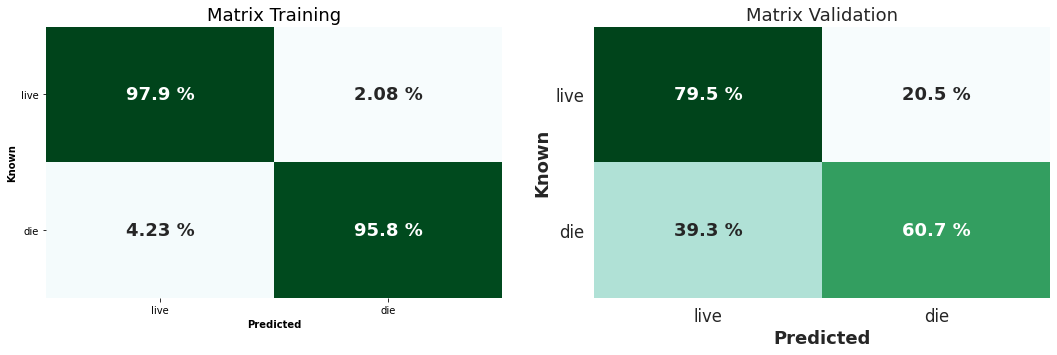

In [10]:
my_functions.plot_confusion_matrices(input_file)

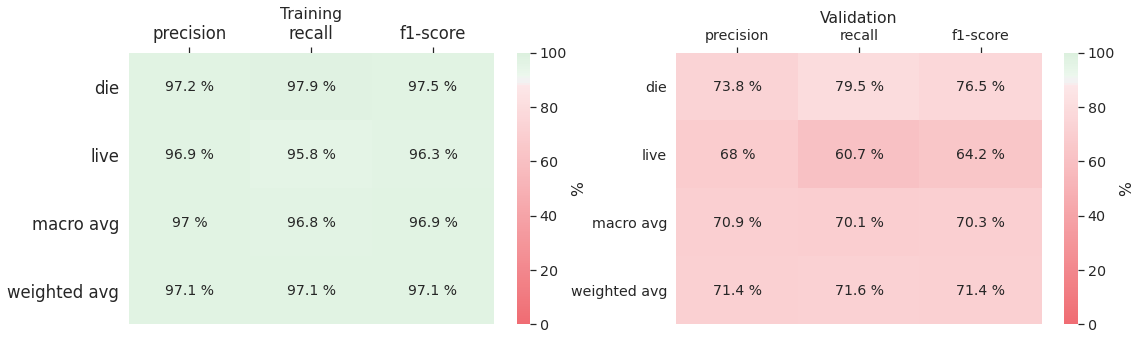

In [11]:
my_functions.plot_classification_reports(input_file)